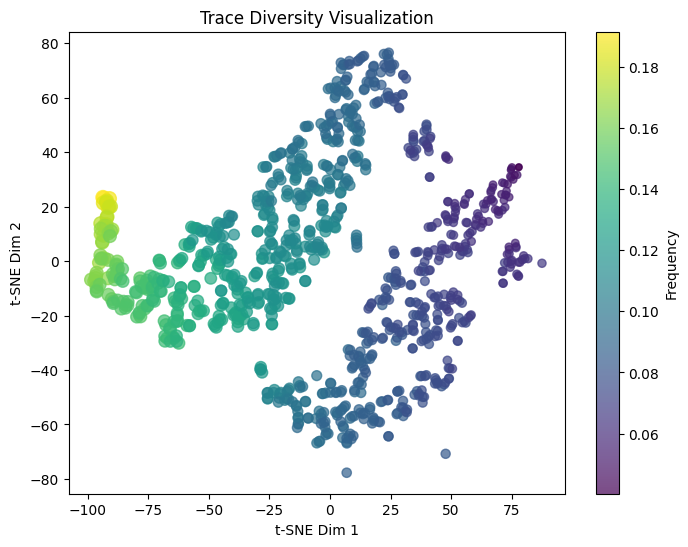

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle

csv_log = "mip" #BPIC15_1, bpic2020, bpic2017_o, helpdesk, sepsis, mip
TYPE = 'all'
# --- Input: your dict of traces and frequencies ---
with open('../semantic_data/' + csv_log + '/' + csv_log + '_encoded_trace_frequencies_' + TYPE + '.pkl', 'rb') as f:
    trace_frequencies = pickle.load(f)

# --- Convert traces into vectors (bag-of-activities) ---
traces = list(trace_frequencies.keys())
freqs = np.array(list(trace_frequencies.values()))

unique_acts = sorted({a for t in traces for a in t})
act_to_idx = {a:i for i,a in enumerate(unique_acts)}

X = np.zeros((len(traces), len(unique_acts)))
for i, t in enumerate(traces):
    for a in t:
        X[i, act_to_idx[a]] += 1

# --- Dimensionality reduction ---
X_embedded = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(X)

# --- Visualization ---
plt.figure(figsize=(8,6))
sc = plt.scatter(X_embedded[:,0], X_embedded[:,1],
                 s=100*freqs/np.max(freqs),  # scale size by frequency
                 alpha=0.7, c=freqs, cmap="viridis")

plt.colorbar(sc, label="Frequency")
plt.title("Trace Diversity Visualization")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


In [7]:
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn

  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.16.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
